### Calculate Fire Extent Accuracy
To calcuate fire extent accuracy, we use the same process however we remap fire severity classes to either `Unburnt` or `Burnt`.

In [15]:
results_duplicate.loc[
    results_duplicate.actual_severity == "Low", "actual_severity"
] = "Burnt"
results_duplicate.loc[
    results_duplicate.actual_severity == "Moderate", "actual_severity"
] = "Burnt"
results_duplicate.loc[
    results_duplicate.actual_severity == "High", "actual_severity"
] = "Burnt"
results_duplicate.loc[
    results_duplicate.actual_severity == "Extreme", "actual_severity"
] = "Burnt"
results_duplicate.loc[
    results_duplicate.classified_severity == "Low", "classified_severity"
] = "Burnt"
results_duplicate.loc[
    results_duplicate.classified_severity == "Moderate", "classified_severity"
] = "Burnt"
results_duplicate.loc[
    results_duplicate.classified_severity == "High", "classified_severity"
] = "Burnt"
results_duplicate.loc[
    results_duplicate.classified_severity == "Extreme", "classified_severity"
] = "Burnt"

In [16]:
results_duplicate.head()

,dNBR,actual_severity,classified_severity,geometry
0,-0.04120,Unburnt,Unburnt,POINT (620890.643 5981712.721)
4,0.00954,Unburnt,Unburnt,POINT (619427.841 6050698.299)
6,-0.05770,Unburnt,Unburnt,POINT (618872.144 5981099.339)
7,-0.14799,Unburnt,Unburnt,POINT (614146.389 6011331.299)
10,-0.07889,Unburnt,Unburnt,POINT (613935.682 6011263.956)


In [17]:
unburnt = results_duplicate.loc[(results_duplicate["actual_severity"] == "Unburnt")]
unburnt = unburnt.sample(n=160)

burnt = results_duplicate.loc[(results_duplicate["actual_severity"] == "Burnt")]
burnt = burnt.sample(n=160)

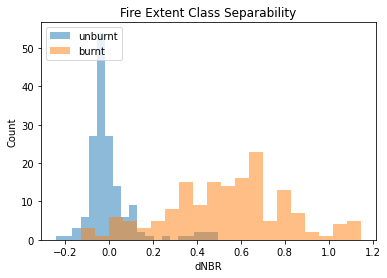

In [18]:
plt.hist(unburnt["dNBR"], bins=20, alpha=0.5, label="unburnt")
plt.hist(burnt["dNBR"], bins=20, alpha=0.5, label="burnt")

plt.legend(loc="upper left")

plt.xlabel("dNBR")
plt.ylabel("Count")
plt.title("Fire Extent Class Separability")

plt.savefig("class_separability_extent.png")
plt.show()

In [19]:
frames = [unburnt, burnt]
results = pd.concat(frames)
results = results[["dNBR", "actual_severity", "classified_severity", "geometry"]]
results.head()

,dNBR,actual_severity,classified_severity,geometry
232,-0.08403,Unburnt,Unburnt,POINT (621556.897 6079711.928)
1050,-0.00610,Unburnt,Unburnt,POINT (606999.560 6022200.241)
650,0.11247,Unburnt,Burnt,POINT (619252.590 6052092.973)
922,-0.05074,Unburnt,Unburnt,POINT (625547.449 5984952.798)
916,0.09580,Unburnt,Unburnt,POINT (619722.073 6050258.325)


In [20]:
xtab = pd.crosstab(results["actual_severity"], results["classified_severity"])
sev = ["Unburnt", "Burnt"]

xtab = xtab.reindex(sev, axis="columns")
xtab = xtab.reindex(sev, axis="rows")
xtab.to_csv("./dNBR_accuracy_extent_random.csv")
xtab

classified_severity,Unburnt,Burnt
actual_severity,,
Unburnt,144,16
Burnt,13,147


In [21]:
overall_accuracy = (
    (xtab["Unburnt"]["Unburnt"] + xtab["Burnt"]["Burnt"]) / len(results) * 100
)

overall_accuracy

90.9375